In [1]:
# pobieranie danych źródłowych
!wget -O cats_and_dogs.zip https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/cats_and_dogs/dogs-vs-cats.zip

--2022-01-09 08:11:48--  https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/cats_and_dogs/dogs-vs-cats.zip
Resolving ml-repository-krakers.s3-eu-west-1.amazonaws.com (ml-repository-krakers.s3-eu-west-1.amazonaws.com)... 52.218.41.240
Connecting to ml-repository-krakers.s3-eu-west-1.amazonaws.com (ml-repository-krakers.s3-eu-west-1.amazonaws.com)|52.218.41.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851576569 (812M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>] 812.13M  11.6MB/s    in 74s     

2022-01-09 08:13:03 (10.9 MB/s) - ‘cats_and_dogs.zip’ saved [851576569/851576569]



In [2]:
!unzip cats_and_dogs.zip

Archive:  cats_and_dogs.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               


In [3]:
!unzip -q train.zip -d kaggle_original_data 

In [4]:
!mv kaggle_original_data/train/* kaggle_original_data/

In [5]:
import os, shutil
import matplotlib.pyplot as plt

In [6]:
base_dir = "cats_and_dogs/"
folder_list = ["train","valid","test"]
for directory in folder_list:
  folder = base_dir + directory
  os.makedirs(folder, exist_ok=True)
  os.makedirs(folder+"/cats", exist_ok=True)
  os.makedirs(folder+"/dogs", exist_ok=True)

In [7]:
for i in range(0, 1500):
  src_file = f"kaggle_original_data/cat.{i}.jpg"
  dst = base_dir + "train/cats"
  shutil.copy(src_file, dst)

  src_file = f"kaggle_original_data/dog.{i}.jpg"
  dst = base_dir + "train/dogs"
  shutil.copy(src_file, dst)


for i in range(1500, 2000):
  src_file = f"kaggle_original_data/cat.{i}.jpg"
  dst = base_dir + "valid/cats"
  shutil.copy(src_file, dst)

  src_file = f"kaggle_original_data/dog.{i}.jpg"
  dst = base_dir + "valid/dogs"
  shutil.copy(src_file, dst) 


for i in range(2000, 2500):
  src_file = f"kaggle_original_data/cat.{i}.jpg"
  dst = base_dir + "test/cats"
  shutil.copy(src_file, dst)

  src_file = f"kaggle_original_data/dog.{i}.jpg"
  dst = base_dir + "test/dogs"
  shutil.copy(src_file, dst)   

In [8]:
from keras.preprocessing import image

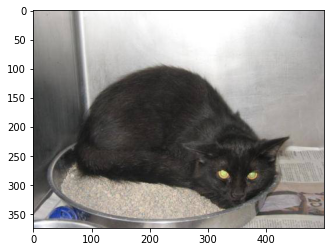

In [11]:
image_index = 1234
img = image.load_img(f"cats_and_dogs/train/cats/cat.{image_index}.jpg")
plt.imshow(img)

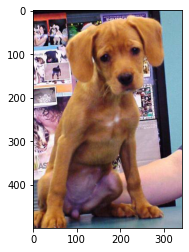

In [12]:
img = image.load_img(f"cats_and_dogs/train/dogs/dog.{image_index}.jpg")
plt.imshow(img)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
shutil.rmtree("aug", ignore_errors=True)
os.makedirs("aug/train", exist_ok=True)
os.makedirs("aug/test", exist_ok=True)
shutil.copy(f"cats_and_dogs/train/dogs/dog.1234.jpg", "aug/train" )
shutil.copy(f"cats_and_dogs/train/cats/cat.1234.jpg", "aug/test" )

'aug/test/cat.1234.jpg'

In [24]:
datagen = ImageDataGenerator(
    rotation_range = 40, zoom_range = 0.2,
    shear_range = 0.2, horizontal_flip = True, vertical_flip = True,
    width_shift_range = 0.2
)

generator = datagen.flow_from_directory(directory="aug", target_size=(150,150), class_mode="binary")

Found 2 images belonging to 2 classes.


In [ ]:
plt.subplots(5,4, figsize=(25,25))

image_index = 1
for image_batch, _ in generator:
  for im in image_batch:
    plt.subplot(5, 4, image_index)
    image_index += 1
    plt.imshow(im.astype("uint8"))
  if image_index>=20:
    break  

In [26]:
# Augemntacja danych dla sieci

train_datagen = ImageDataGenerator(
    rotation_range = 40, zoom_range = 0.2,
    shear_range = 0.2, horizontal_flip = True, vertical_flip = True,
    width_shift_range = 0.2,
    rescale = 1/255
)
train_generator = train_datagen.flow_from_directory(directory="cats_and_dogs/train", target_size=(150,150), class_mode="binary")

valid_datagen = ImageDataGenerator(rescale=1/255)
valid_generator = valid_datagen.flow_from_directory(directory="cats_and_dogs/valid", target_size=(150,150), class_mode="binary")

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
